In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import date

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [99]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [100]:
url_data = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df['Unidade da Federação'] = df["Unidade da Federação"].str[3:]
df = df.drop(columns = ['Total'])

colunas = df.mean().index.tolist()
colunas.insert(0, "Unidade da Federação")
df = df[colunas]
df = df.set_index('Unidade da Federação')
df = df /1e6
df = df.sort_values(by = df.columns.max(), ascending = False)
df.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,...,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,...,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,...,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,...,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,...,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84


In [101]:
mensal = df.T

meses = {
    "Jan":1,
    "Fev":2,
    "Mar":3,
    "Abr":4,
    "Mai":5,
    "Jun":6,
    "Jul":7,
    "Ago":8,
    "Set":9,
    "Out":10,
    "Nov":11,
    "Dez":12
}

def convert_date(ano_mes):
    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    mes_numero = int(meses[mes])
    return date(ano,mes_numero,1)

# Map: aplica a função em todas as linhas do index
mensal.index = mensal.index.map(convert_date)
mensal.index.name = "Data"

mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Alagoas,Amazonas,Piauí,Mato Grosso,Sergipe,Rondônia,Acre,Roraima,Amapá,Tocantins
Data,,,,,,,,,,,,,,,,,,,,,
2008-01-01,91.68,45.67,38.27,30.93,23.03,21.21,14.39,16.50,15.54,15.31,...,6.24,4.74,7.99,4.80,2.78,1.39,0.90,0.66,1.12,3.44
2008-02-01,148.68,70.19,55.38,57.36,28.39,28.19,24.18,25.65,25.74,22.26,...,8.38,7.12,10.08,8.68,3.68,2.93,1.50,0.78,1.27,4.99
2008-03-01,156.09,79.23,53.80,51.55,44.57,34.18,29.99,26.74,28.72,21.44,...,8.41,8.20,10.30,7.89,5.05,1.54,1.79,0.72,0.97,6.21
2008-04-01,161.23,77.14,52.46,56.67,44.05,39.03,34.81,27.18,30.68,20.92,...,9.09,8.26,10.78,8.79,5.05,1.53,1.73,0.84,1.14,4.98
2008-05-01,187.12,80.55,54.42,48.40,44.91,42.95,32.15,26.85,30.60,21.62,...,9.34,7.83,10.40,9.23,4.74,1.65,1.82,0.86,0.87,5.51


In [102]:
mensal_aberto = mensal.reset_index().melt(id_vars = 'Data', value_vars = mensal.columns)
mensal_aberto.columns = ['data', 'uf', 'gasto']
mensal_aberto['data'] = mensal_aberto['data'].astype('datetime64')
mensal_aberto.head()

,data,uf,gasto
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12


In [103]:
mensal_aberto['mes'] = mensal_aberto['data'].dt.month
mensal_aberto['ano'] = mensal_aberto['data'].dt.year
mensal_aberto.head()

,data,uf,gasto,mes,ano
0,2008-01-01,São Paulo,91.68,1,2008
1,2008-02-01,São Paulo,148.68,2,2008
2,2008-03-01,São Paulo,156.09,3,2008
3,2008-04-01,São Paulo,161.23,4,2008
4,2008-05-01,São Paulo,187.12,5,2008


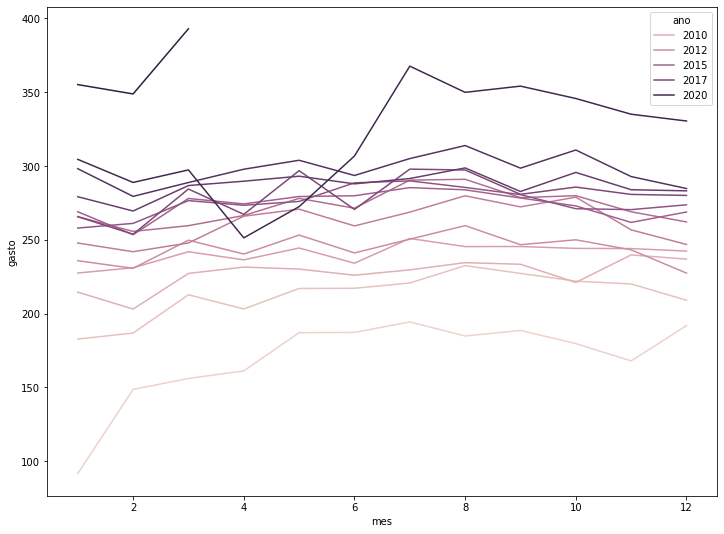

In [104]:
plt.figure( figsize= (12,9) )

ax = sns.lineplot(data = mensal_aberto.query("uf == 'São Paulo'"), x = 'mes', y = 'gasto', hue = 'ano')

# Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

In [111]:
mensal_aberto['uf'].unique()

array(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Espírito Santo', 'Maranhão', 'Pará', 'Distrito Federal',
       'Paraíba', 'Mato Grosso do Sul', 'Rio Grande do Norte', 'Alagoas',
       'Amazonas', 'Piauí', 'Mato Grosso', 'Sergipe', 'Rondônia', 'Acre',
       'Roraima', 'Amapá', 'Tocantins'], dtype=object)

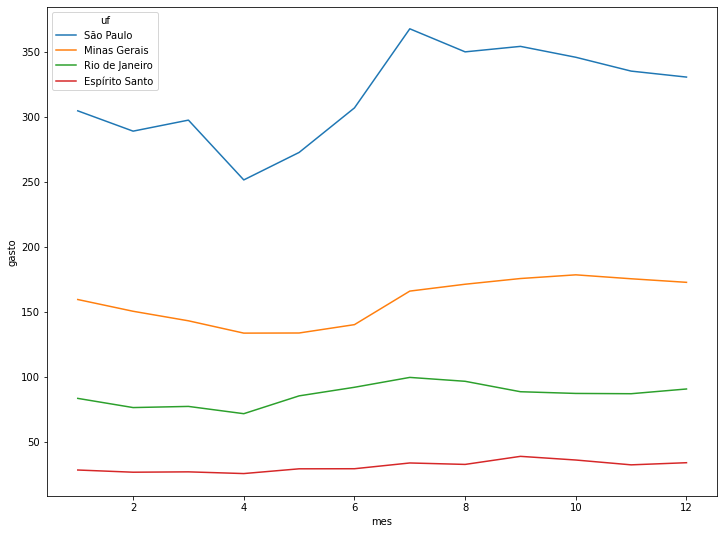

In [112]:
plt.figure( figsize= (12,9) )
sudeste = ['São Paulo', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro']
ax = sns.lineplot(data = mensal_aberto.query("uf in @sudeste & ano == 2020"), x = 'mes', y = 'gasto', hue = 'uf')